# Hand written digit recognition with TensorFlow

Starting with importing the required libraries


In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.2.0


Loading MNIST DATASET (Modified National Institute of Standards and Technology database). 

Overview: MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms. MNIST is short for Modified National Institute of Standards and Technology database. MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9. The dataset is already divided into training and testing sets.

In [2]:
# Load MNIST training and test datasets.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Standardize the data.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev 
test_images = (test_images - mean) / stddev 

# One-hot encode labels.
one_hot_train_labels = to_categorical(train_labels, num_classes=10)
one_hot_test_labels = to_categorical(test_labels, num_classes=10)


11493376/11490434 [==============================] - 0s 0us/step


The abstraction level is to use layers as building blocks. We use tanh and logistic sigmoid as activation functions in this notebook.

In [3]:
# Two Dense (fully-connected) layers with 25 and 10 neurons.
# The Flatten() layer is not a "real" layer but is only used to reshape the input from 2 dimensions to 1 dimension.
# tanh as activation function for hidden layer. Reference : https://www.researchgate.net/figure/Tanh-function-Source_fig3_350103066
# Logistic (sigmoid) as activation function for output layer. Reference : https://www.researchgate.net/figure/Sigmoid-function-Sigmoid-Function-is-the-most-common-form-of-activation-function-used-in_fig3_260796259

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')])


The network is ready to get trained. 
We use Stochastic Gradient Descent (SGD). Reference : https://www.researchgate.net/publication/358769475_Stochastic_Gradient_Descent_Algorithm_SGD
Loss Function Used (MSE). Reference : https://www.researchgate.net/figure/Evolution-of-the-MSE-Mean-Squared-Error-as-a-function-of-the-size-of-the-training-set_fig4_328439451
 

In [4]:
# MSE as loss function and report accuracy during training.
opt = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer = opt, loss='mean_squared_error', metrics =['accuracy'])

# Training the model for 10 epochs.
# Shuffle/Randomize the order.
# Usig 64 training examples for each weight update.
history = model.fit(train_images, one_hot_train_labels, 
                    validation_data=(test_images, one_hot_test_labels), 
                    epochs=10, batch_size=64, verbose=2, shuffle=True)


Epoch 1/10
938/938 - 2s - loss: 0.0637 - accuracy: 0.6307 - val_loss: 0.0456 - val_accuracy: 0.7740
Epoch 2/10
938/938 - 2s - loss: 0.0395 - accuracy: 0.8235 - val_loss: 0.0338 - val_accuracy: 0.8674
Epoch 3/10
938/938 - 2s - loss: 0.0310 - accuracy: 0.8693 - val_loss: 0.0276 - val_accuracy: 0.8873
Epoch 4/10
938/938 - 2s - loss: 0.0262 - accuracy: 0.8843 - val_loss: 0.0240 - val_accuracy: 0.8966
Epoch 5/10
938/938 - 2s - loss: 0.0232 - accuracy: 0.8941 - val_loss: 0.0216 - val_accuracy: 0.9033
Epoch 6/10
938/938 - 2s - loss: 0.0212 - accuracy: 0.9002 - val_loss: 0.0199 - val_accuracy: 0.9089
Epoch 7/10
938/938 - 2s - loss: 0.0197 - accuracy: 0.9051 - val_loss: 0.0186 - val_accuracy: 0.9119
Epoch 8/10
938/938 - 2s - loss: 0.0186 - accuracy: 0.9090 - val_loss: 0.0177 - val_accuracy: 0.9144
Epoch 9/10
938/938 - 2s - loss: 0.0177 - accuracy: 0.9122 - val_loss: 0.0169 - val_accuracy: 0.9168
Epoch 10/10
938/938 - 2s - loss: 0.0169 - accuracy: 0.9145 - val_loss: 0.0163 - val_accuracy: 0.9182

Our model is now trained
Now we will use our trained model to predict one of the test digits.

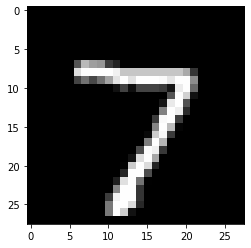

Ground truth: 7
Prediction: 7


In [5]:
# Print a digit and label, and predict it.

# If you pick example 8, then chances are that the model fails to predict it correctly.

TEST_NUM = 0

plt.imshow(test_images[TEST_NUM], cmap=plt.get_cmap('gray'))
plt.show()
print('Ground truth:', test_labels[TEST_NUM])
prediction = model.predict(test_images[TEST_NUM:(TEST_NUM + 1)]) # We pick a range to make sure that it is still an array.
print('Prediction:', prediction[0].argmax()) # argmax() returns the index of the maximum value
